In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

demography = pd.read_csv('Documents/projet-hemorragie/data-source/patient_demographics.csv')
demography.head()

,Patient Number,Age\n(years),Gender,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,Fracture (Yes/No),Condition on file,Note
0,49,35.000000,Male,NaN,1.0,NaN,1.0,NaN,1.0,Intracranial HGE+ Extradural HGE,NaN
1,50,0.583333,Female,NaN,1.0,NaN,NaN,NaN,1.0,Subdural HGE,NaN
2,51,5.000000,Male,NaN,1.0,NaN,NaN,1.0,1.0,Extadural HGE,NaN
3,52,8.000000,Male,NaN,NaN,NaN,1.0,NaN,1.0,Extadural HGE,NaN
4,53,44.000000,Male,NaN,1.0,NaN,1.0,NaN,1.0,Intracranial HGE+ Extradural HGE,NaN


In [ ]:
demography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient Number     82 non-null     int64  
 1   Age
(years)        82 non-null     float64
 2   Gender             82 non-null     object 
 3   Intraventricular   5 non-null      float64
 4   Intraparenchymal   16 non-null     float64
 5   Subarachnoid       7 non-null      float64
 6   Epidural           21 non-null     float64
 7   Subdural           4 non-null      float64
 8   Fracture (Yes/No)  22 non-null     float64
 9   Condition on file  82 non-null     object 
 10  Note               1 non-null      object 
dtypes: float64(7), int64(1), object(3)
memory usage: 7.2+ KB


Il y a 82 entrées dans le tableau, correspondant aux 82 patients

In [ ]:
# on remplace les les float par des integer et les NaN par 0
from sklearn.preprocessing import LabelEncoder
cols = ["Intraventricular","Intraparenchymal","Subarachnoid","Epidural","Subdural","Fracture (Yes/No)"]
demography[cols] = demography[cols].replace(np.nan, 0)
demography[cols] = demography[cols].astype(int)
demography.info
demography.head(25)

,Patient Number,Age\n(years),Gender,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,Fracture (Yes/No),Condition on file,Note
0,49,35.000000,Male,0,1,0,1,0,1,Intracranial HGE+ Extradural HGE,NaN
1,50,0.583333,Female,0,1,0,0,0,1,Subdural HGE,NaN
2,51,5.000000,Male,0,1,0,0,1,1,Extadural HGE,NaN
3,52,8.000000,Male,0,0,0,1,0,1,Extadural HGE,NaN
4,53,44.000000,Male,0,1,0,1,0,1,Intracranial HGE+ Extradural HGE,NaN
5,54,60.000000,Female,0,0,0,0,0,0,Normal CT,NaN
6,55,21.000000,Female,0,0,0,0,0,0,Normal CT,NaN
7,56,58.000000,Female,0,0,0,0,0,0,Normal CT,NaN
8,57,26.000000,Male,0,0,0,0,0,0,Normal CT,NaN
9,58,44.000000,Male,0,1,0,0,0,0,Normal CT,NaN


On remplace les données NAN  par 0 pour l'absence d'une hémorragie dans la région définie.
Et si présence d'une hémorragie, on code en 1 (integer) à la place d'un float

In [ ]:
# On renomme les colonnes
demography = demography.rename(columns={'Age\n(years)': 'Age', 'Fracture (Yes/No)': 'Fracture'})

# on va déjà reperer les valeurs absurdes
outliers = demography[(demography.Age < 1) | (demography.Age > 100)]
outliers
demography_outliersfree = demography[demography.Age >= 1]
# les patients 50, 66 et 85 sont out of range. On pourrait se dire qu'il s'agit de nourrisson sauf pour le patient
# 85 pour qui 0.0027 années parait totalement incohérent. Dans le doute, on n'inclus pas ce patients dans le calcul
# de la dispersion de l'âge

# on va mettre à NaN ces valeurs absurdes pour conserver les autres données de ces mêmes patients dans le DF
demography.Age = demography.Age.mask(demography.Age < 1)
demography


,Patient Number,Age,Gender,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,Fracture,Condition on file,Note
0,49,35.0,Male,0,1,0,1,0,1,Intracranial HGE+ Extradural HGE,NaN
1,50,NaN,Female,0,1,0,0,0,1,Subdural HGE,NaN
2,51,5.0,Male,0,1,0,0,1,1,Extadural HGE,NaN
3,52,8.0,Male,0,0,0,1,0,1,Extadural HGE,NaN
4,53,44.0,Male,0,1,0,1,0,1,Intracranial HGE+ Extradural HGE,NaN
...,...,...,...,...,...,...,...,...,...,...,...
77,126,58.0,Female,0,0,0,0,0,0,Normal CT,NaN
78,127,5.0,Male,0,0,0,0,0,0,Normal CT,NaN
79,128,32.0,Female,0,0,0,0,0,0,Normal CT,NaN
80,129,5.0,Female,0,0,0,0,0,0,Normal CT,NaN


Les patients dont l'âge est inférieur à 1 an et supérieur à 100 ans sont considérés comme des outliers.
Les patients 50, 66 et 85 sont out of range. On pourrait se dire qu'il s'agit de nourrisson sauf pour le patient
85 pour qui 0.0027 années parait totalement incohérent. Dans le doute, nous décidons de ne pas inclure ces patients dans le calcul de la dispersion de l'âge. POur ces outliers, l'âge est mis à NaN (manquant)

In [ ]:
demography.info()
demography.Age.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient Number     82 non-null     int64  
 1   Age                79 non-null     float64
 2   Gender             82 non-null     object 
 3   Intraventricular   82 non-null     int64  
 4   Intraparenchymal   82 non-null     int64  
 5   Subarachnoid       82 non-null     int64  
 6   Epidural           82 non-null     int64  
 7   Subdural           82 non-null     int64  
 8   Fracture           82 non-null     int64  
 9   Condition on file  82 non-null     object 
 10  Note               1 non-null      object 
dtypes: float64(1), int64(7), object(3)
memory usage: 7.2+ KB


count    79.000000
mean     28.886076
std      19.121734
min       1.000000
25%      15.500000
50%      28.000000
75%      40.500000
max      72.000000
Name: Age, dtype: float64

Il y a une grande dispersion des âges et peu de données. POur plus de lisibilité,  nous décidons de regrouper les patients par classes d'âge, représentées par les quartiles.

In [ ]:
#création des groupes d'âge
demography['Age_classe'] = pd.qcut(demography.Age, q=4, labels=['[1-15]',']15-28]',']28-40]','>40'])
demography

,Patient Number,Age,Gender,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,Fracture,Condition on file,Note,Age_classe
0,49,35.0,Male,0,1,0,1,0,1,Intracranial HGE+ Extradural HGE,NaN,]28-40]
1,50,NaN,Female,0,1,0,0,0,1,Subdural HGE,NaN,NaN
2,51,5.0,Male,0,1,0,0,1,1,Extadural HGE,NaN,[1-15]
3,52,8.0,Male,0,0,0,1,0,1,Extadural HGE,NaN,[1-15]
4,53,44.0,Male,0,1,0,1,0,1,Intracranial HGE+ Extradural HGE,NaN,>40
...,...,...,...,...,...,...,...,...,...,...,...,...
77,126,58.0,Female,0,0,0,0,0,0,Normal CT,NaN,>40
78,127,5.0,Male,0,0,0,0,0,0,Normal CT,NaN,[1-15]
79,128,32.0,Female,0,0,0,0,0,0,Normal CT,NaN,]28-40]
80,129,5.0,Female,0,0,0,0,0,0,Normal CT,NaN,[1-15]


In [ ]:
#création de la colonne hémorragie
hemo_cols = ['Intraventricular', 'Intraparenchymal', 'Subarachnoid', 'Epidural', 'Subdural']
demography['Hemorrhage'] = demography[hemo_cols].any(axis='columns').astype(int)
demography

,Patient Number,Age,Gender,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,Fracture,Condition on file,Note,Age_classe,Hemorrhage
0,49,35.0,Male,0,1,0,1,0,1,Intracranial HGE+ Extradural HGE,NaN,]28-40],1
1,50,NaN,Female,0,1,0,0,0,1,Subdural HGE,NaN,NaN,1
2,51,5.0,Male,0,1,0,0,1,1,Extadural HGE,NaN,[1-15],1
3,52,8.0,Male,0,0,0,1,0,1,Extadural HGE,NaN,[1-15],1
4,53,44.0,Male,0,1,0,1,0,1,Intracranial HGE+ Extradural HGE,NaN,>40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,126,58.0,Female,0,0,0,0,0,0,Normal CT,NaN,>40,0
78,127,5.0,Male,0,0,0,0,0,0,Normal CT,NaN,[1-15],0
79,128,32.0,Female,0,0,0,0,0,0,Normal CT,NaN,]28-40],0
80,129,5.0,Female,0,0,0,0,0,0,Normal CT,NaN,[1-15],0


In [ ]:
#création de combinaisons hemorragique (avec et sans fracture)
demography['Inv'] = demography['Intraventricular'].apply(lambda x: 'Inv' if (x == 1) else '')
demography['Inp'] = demography['Intraparenchymal'].apply(lambda x: 'Inp' if (x == 1) else '')
demography['Sua'] = demography['Subarachnoid'].apply(lambda x: 'Sua' if (x == 1) else '')
demography['Epi'] = demography['Epidural'].apply(lambda x: 'Epi' if (x == 1) else '')
demography['Sud'] = demography['Subdural'].apply(lambda x: 'Sud' if (x == 1) else '')
demography['Comb'] = demography['Inv'] + demography['Inp'] + demography['Sua'] + demography['Epi'] + demography['Sud']

# combinaison pour hemorragies
demography.loc[demography['Hemorrhage'] == 1, 'Combi-hemo'] = demography['Comb'] 
demography.loc[demography['Hemorrhage'] == 0, 'Combi-hemo'] = 'No hemorrhage' 

# combinaison pour fractures
demography.loc[demography['Fracture'] == 1, 'Combi-frac'] = demography['Comb'] 
demography.loc[demography['Fracture'] == 0, 'Combi-frac'] = 'No Fracture' 

#on drop les colonnes inutiles
demography = demography.drop(columns = ['Inv', 'Inp', 'Sua', 'Epi', 'Sud', 'Comb'])

In [ ]:
#sauvegarde du dataframe créé
demography.to_csv('Documents/projet-hemorragie/data-source/demo.csv', index=False)

In [ ]:
import seaborn as sns

demography.head(25)

,Patient Number,Age,Gender,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,Fracture,Condition on file,Note,Age_classe,Hemorrhage,Combi-hemo,Combi-frac
0,49,35.0,Male,0,1,0,1,0,1,Intracranial HGE+ Extradural HGE,NaN,]28-40],1,InpEpi,InpEpi
1,50,NaN,Female,0,1,0,0,0,1,Subdural HGE,NaN,NaN,1,Inp,Inp
2,51,5.0,Male,0,1,0,0,1,1,Extadural HGE,NaN,[1-15],1,InpSud,InpSud
3,52,8.0,Male,0,0,0,1,0,1,Extadural HGE,NaN,[1-15],1,Epi,Epi
4,53,44.0,Male,0,1,0,1,0,1,Intracranial HGE+ Extradural HGE,NaN,>40,1,InpEpi,InpEpi
5,54,60.0,Female,0,0,0,0,0,0,Normal CT,NaN,>40,0,No hemorrhage,No Fracture
6,55,21.0,Female,0,0,0,0,0,0,Normal CT,NaN,]15-28],0,No hemorrhage,No Fracture
7,56,58.0,Female,0,0,0,0,0,0,Normal CT,NaN,>40,0,No hemorrhage,No Fracture
8,57,26.0,Male,0,0,0,0,0,0,Normal CT,NaN,]15-28],0,No hemorrhage,No Fracture
9,58,44.0,Male,0,1,0,0,0,0,Normal CT,NaN,>40,1,Inp,No Fracture


In [ ]:
# stats descriptive du tableau
demography.describe()

,Patient Number,Age,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,Fracture,Hemorrhage
count,82.000000,79.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,89.500000,28.886076,0.060976,0.195122,0.085366,0.256098,0.048780,0.268293,0.439024
std,23.815261,19.121734,0.240758,0.398733,0.281145,0.439162,0.216734,0.445797,0.499322
min,49.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.250000,15.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,89.500000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,109.750000,40.500000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,1.000000
max,130.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


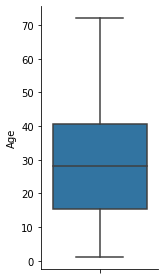

In [ ]:
#moyenne d'âge de l'échantillon
sns.catplot(y='Age', data=demography, kind='box', height=4, aspect=.6);

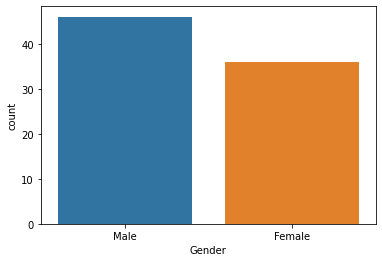

In [ ]:
# répartition des genres
sns.countplot(x='Gender', data=demography);

Il y a une plus grande proportion d'hommes que de femmes dans notre base de données

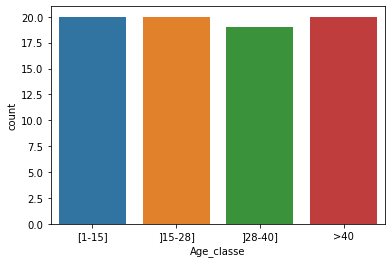

In [ ]:
# Dispersion de l'âge au global et du genre
sns.countplot(x='Age_classe', data=demography);
# réapartition équitable logique du fait d'avoir pris les quartiles

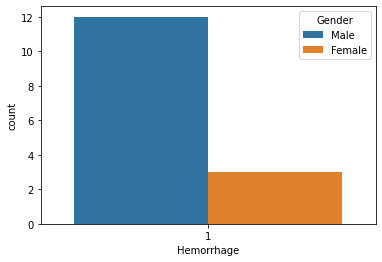

In [ ]:
# répartition des hemorragies en fonction du sexe (hors fracture)
sns.countplot(x='Hemorrhage', hue='Gender', 
              data=demography[(demography.Fracture == 0) & (demography.Hemorrhage == 1)]);
# plus grande proportion d'hommes à avoir des hemorragies hors fractures (AVC ou autre)

Les hommes sont sur-représentés pour les hémorragies hors fracture

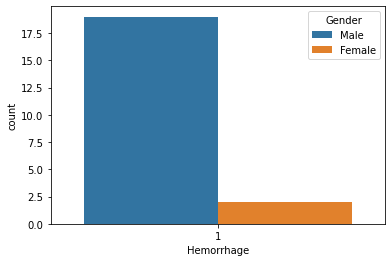

In [ ]:
# répartition des hemorragies en fonction du sexe (fractures uniquement)
sns.countplot(x='Hemorrhage', hue='Gender', 
              data=demography[(demography.Fracture == 1) & (demography.Hemorrhage == 1)]);
# sur-représentation des hommes pour les hémorragies issues d'une fracture

Sur-représentation des hommes pour les hémorragies conséquentes à des fractures

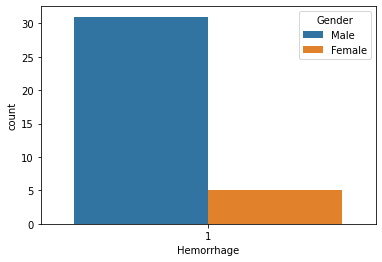

In [ ]:
# répartition des hemorragies en fonction du sexe (fractures uniquement)
sns.countplot(x='Hemorrhage', hue='Gender', 
              data=demography[demography.Hemorrhage == 1]);
# sur-représentation des hommes pour les hémorragies issues d'une fracture

Sur-représentation des hommes pour les hémorragies conséquentes ou non à des fractures.

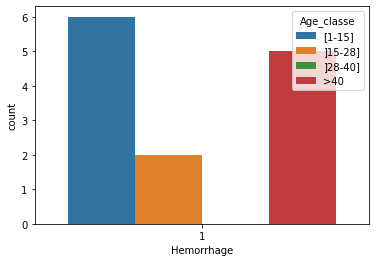

In [ ]:
# répartition des hemorragies en fonction de la tranche d'âge (hors fracture)
sns.countplot(x='Hemorrhage', hue='Age_classe', 
              data=demography[(demography.Fracture == 0) & (demography.Hemorrhage == 1)]);
# grande proportion des plus jeunes et des plus âgés. Aucun cas d'hemorragie hors fracture n'est repertorié 
# ches les 28-40 ans

Forte proportion des hémorragies (hors fracture) des plus jeunes [1-15] ans et des plus âgés > 40. Aucun cas d'hémorragie hors fracture n'est repertorié chez les 28-40 ans.

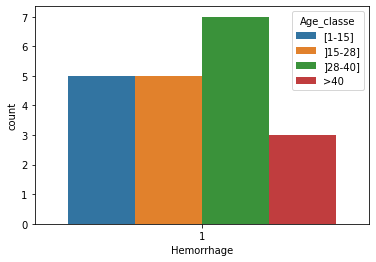

In [ ]:
# répartition des hemorragies en fonction de la tranche d'âge (fractures uniquement)
sns.countplot(x='Hemorrhage', hue='Age_classe', 
              data=demography[(demography.Fracture == 1) & (demography.Hemorrhage == 1)]);
# sur-représentation de la classe d'âge 29-40 pour les hemorragies liées à une fracture

Les hémorragies conséquentes à des fractures sont plus importantes chez les 29-40 ans. Mais comme pour tous les diagrammes, il s'agit d'une différence de quelques individus (non significative).

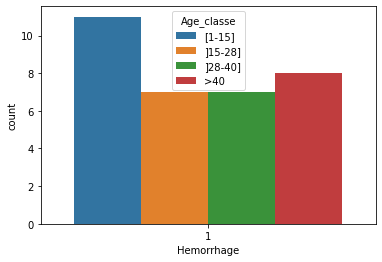

In [ ]:
# proportion de survenu d'une hemorragie par tranche d'âge (incluant fracture)
sns.countplot(x='Hemorrhage', hue='Age_classe', 
              data=demography[demography.Hemorrhage == 1]);

Survenue d'une hémorragie, conséquente ou non à une fracture par tranche dâge montre qu'il y a plus d'individus de la classe [1-15] ans

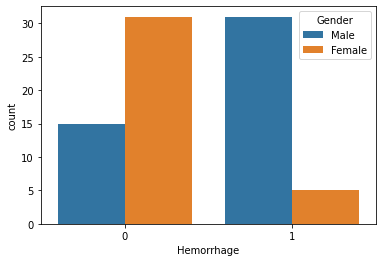

In [ ]:
# Présence ou non d'une hemorragie par genre (incluant fracture)
sns.countplot(x='Hemorrhage', hue='Gender', 
              data=demography);

Sur représentation des femmes pour les données sans hémorragies et sur-représenation des hommes pour les données présentant des hémorragies.

In [ ]:
# relation entre genre et survenu d'une hemorragie ?
from sklearn import preprocessing
le = LabelEncoder()
demography['Gender_bool'] = le.fit_transform(demography.Gender)
demography['Age_classe_2'] = le.fit_transform(demography.Age_classe)
abs(demography.corr(method='pearson'))
# pas de correlation particulière observée.
# Note: les stats descriptives ici ne servent qu'à donner une idée des données, il ne s'agit pas d'une BDD
# sur des données épidémilogiques (donc biaisée par défaut sur les constatations)

,Patient Number,Age,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,Fracture,Hemorrhage,Gender_bool,Age_classe_2
Patient Number,1.000000,0.036355,0.011842,0.345827,0.047019,0.321663,0.193739,0.363971,0.510792,0.364406,0.125374
Age,0.036355,1.000000,0.265746,0.239015,0.168319,0.273826,0.010770,0.109496,0.130005,0.104593,0.270553
Intraventricular,0.011842,0.265746,1.000000,0.388946,0.469324,0.032751,0.057706,0.075749,0.288050,0.122734,0.079930
Intraparenchymal,0.345827,0.239015,0.388946,1.000000,0.400225,0.006878,0.174217,0.326940,0.556565,0.249547,0.082015
Subarachnoid,0.047019,0.168319,0.469324,0.400225,1.000000,0.020730,0.069183,0.307520,0.345339,0.270266,0.073817
Epidural,0.321663,0.273826,0.032751,0.006878,0.020730,1.000000,0.003164,0.527549,0.663243,0.406459,0.069596
Subdural,0.193739,0.010770,0.057706,0.174217,0.069183,0.003164,1.000000,0.246203,0.255983,0.086255,0.061515
Fracture,0.363971,0.109496,0.075749,0.326940,0.307520,0.527549,0.246203,1.000000,0.629022,0.369297,0.147841
Hemorrhage,0.510792,0.130005,0.288050,0.556565,0.345339,0.663243,0.255983,0.629022,1.000000,0.535024,0.028212
Gender_bool,0.364406,0.104593,0.122734,0.249547,0.270266,0.406459,0.086255,0.369297,0.535024,1.000000,0.033754


Test d'une corrélation de Pearson pour voir si l'on peut mettre en évidence la présence d'une hémorragie en fonction du sexe. Le test nous indique qu'il n'y a pas de corrélation.

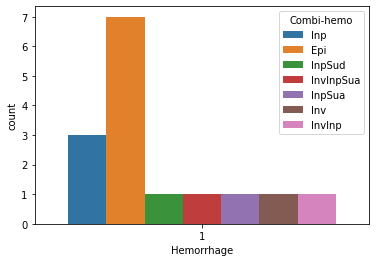

In [ ]:
#répartition des combinaisons de type d'hemmoragie (hors fracture)
sns.countplot(x='Hemorrhage', hue='Combi-hemo', 
              data=demography[(demography.Fracture == 0) & (demography.Hemorrhage == 1)]);
#Sur-représentation de la combinaison EPI 

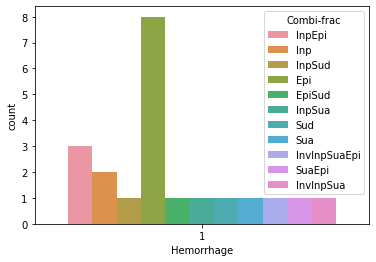

In [ ]:
#répartition des combinaisons de type d'hemmoragie (fracture uniquement)
sns.countplot(x='Hemorrhage', hue='Combi-frac', 
              data=demography[(demography.Fracture == 1) & (demography.Hemorrhage == 1)]);
#Sur-représentation de la combinaison EPI uniquement (plus de cas combinatoires représentés par les fractures)

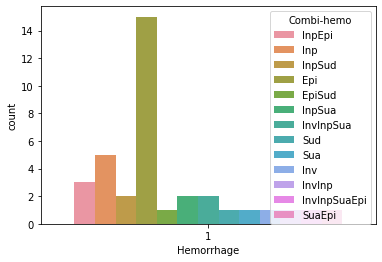

In [ ]:
#répartition des combinaisons de type d'hemmoragie (incluant fracture)
sns.countplot(x='Hemorrhage', hue='Combi-hemo', 
              data=demography[demography.Hemorrhage == 1]);
#Sur-représentation de la combinaison EPI 

Les statistiques descriptives sur ces données ont été fait uniquement dans le but de présenter les caractéristiques des patients dont les coupes de cerveau (les différentes coupes radio) ont servi à entrainer nos modèles de reconnaissance d'hémorragie; donc uniquement à but informatif et ne peuvent en aucun cas être utilisées pour de quelconques conclusions ou pistes d'étude.